# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [2]:
#TODO

diabetesData = pd.read_csv("DiabetesTest.csv")
diabetesData.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,3,78,50,32,88,31.0,0.248,26
2,7,147,76,0,0,39.4,0.257,43
3,1,97,66,15,140,23.2,0.487,22
4,4,111,72,47,207,37.1,1.390,56


**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [3]:
import pandas as pd

# Load dataset
diabetesData = pd.read_csv('DiabetesTrain.csv')

# Strip any extra spaces in column names
diabetesData.columns = diabetesData.columns.str.strip()

# Ensure 'Outcome' exists
if 'Outcome' not in diabetesData.columns:
    raise ValueError("The dataset does not contain the 'Outcome' column.")

print(f"Total patients: {len(diabetesData)}")

# Define events as boolean masks
total_patients = len(diabetesData)
A = diabetesData["BMI"] < 25       # BMI < 25
B = diabetesData["Glucose"] > 100  # Glucose > 100
C = diabetesData["Pregnancies"] > 2  # Pregnancies > 2
D = diabetesData["Outcome"] == 1    # High risk of diabetes

# Print event counts
print(f"\nEvent counts:")
print(f"A (BMI < 25): {A.sum()} patients")
print(f"B (Glucose > 100): {B.sum()} patients")
print(f"C (Pregnancies > 2): {C.sum()} patients")
print(f"D (High diabetes risk): {D.sum()} patients")

# Individual probabilities
P_A = A.sum() / total_patients
P_B = B.sum() / total_patients
P_C = C.sum() / total_patients
P_D = D.sum() / total_patients

print(f"\nIndividual Probabilities:")
print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(C) = {P_C:.4f}")
print(f"P(D) = {P_D:.4f}")

# Joint probabilities
P_A_D = ((A) & (D)).sum() / total_patients
P_B_D = ((B) & (D)).sum() / total_patients
P_C_D = ((C) & (D)).sum() / total_patients

print(f"\nJoint Probabilities:")
print(f"P(A,D) = {P_A_D:.4f}")
print(f"P(B,D) = {P_B_D:.4f}")
print(f"P(C,D) = {P_C_D:.4f}")

# Conditional probabilities
P_D_given_A = P_A_D / P_A if P_A > 0 else 0
P_D_given_B = P_B_D / P_B if P_B > 0 else 0
P_D_given_C = P_C_D / P_C if P_C > 0 else 0

print(f"\nConditional Probabilities:")
print(f"P(D|A) = {P_D_given_A:.4f}")
print(f"P(D|B) = {P_D_given_B:.4f}")
print(f"P(D|C) = {P_D_given_C:.4f}")

# Determine the factor that contributes most
max_conditional = max(P_D_given_A, P_D_given_B, P_D_given_C)

if max_conditional == P_D_given_A:
    Q2 = 'A'
    risk_factor = "BMI < 25"
elif max_conditional == P_D_given_B:
    Q2 = 'B'
    risk_factor = "Glucose > 100"
else:
    Q2 = 'C'
    risk_factor = "Pregnancies > 2"

print(f"\nAnalysis Results:")
print(f"Highest conditional probability: {max_conditional:.4f}")
print(f"Factor that contributes most to diabetes risk: {risk_factor}")
print(f"Answer Q2 = '{Q2}'")

# Summary table
summary_df = pd.DataFrame({
    'Event': ['A (BMI < 25)', 'B (Glucose > 100)', 'C (Pregnancies > 2)'],
    'P(Event)': [P_A, P_B, P_C],
    'P(Event, D)': [P_A_D, P_B_D, P_C_D],
    'P(D|Event)': [P_D_given_A, P_D_given_B, P_D_given_C]
})

print(f"\nSummary Table:")
print(summary_df.round(4))

# Interpretation
print(f"\nInterpretation:")
print(f"The event with the highest P(D|Event) is the strongest predictor of diabetes risk.")
print(f"In this dataset, '{risk_factor}' has the highest conditional probability of {max_conditional:.4f}.")


Total patients: 399

Event counts:
A (BMI < 25): 59 patients
B (Glucose > 100): 294 patients
C (Pregnancies > 2): 215 patients
D (High diabetes risk): 151 patients

Individual Probabilities:
P(A) = 0.1479
P(B) = 0.7368
P(C) = 0.5388
P(D) = 0.3784

Joint Probabilities:
P(A,D) = 0.0075
P(B,D) = 0.3559
P(C,D) = 0.2531

Conditional Probabilities:
P(D|A) = 0.0508
P(D|B) = 0.4830
P(D|C) = 0.4698

Analysis Results:
Highest conditional probability: 0.4830
Factor that contributes most to diabetes risk: Glucose > 100
Answer Q2 = 'B'

Summary Table:
                 Event  P(Event)  P(Event, D)  P(D|Event)
0         A (BMI < 25)    0.1479       0.0075      0.0508
1    B (Glucose > 100)    0.7368       0.3559      0.4830
2  C (Pregnancies > 2)    0.5388       0.2531      0.4698

Interpretation:
The event with the highest P(D|Event) is the strongest predictor of diabetes risk.
In this dataset, 'Glucose > 100' has the highest conditional probability of 0.4830.


**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [4]:
#TODO

diabetesX = diabetesData.values
print(f"diabetesX shape: {diabetesX.shape}")
diabetesX.ndim  # Should output 2

diabetesX shape: (399, 9)


2

**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [5]:
#TODO

print("Original column means:")
original_means = np.mean(diabetesX, axis=0)
print(original_means)

# Center each column by subtracting the column mean
diabetesX -= np.mean(diabetesX, axis=0)

centered_means = np.mean(diabetesX, axis=0)
print(centered_means)

Original column means:
[  3.84711779 121.95989975  68.8245614   20.84962406  84.12280702
  32.14360902   0.4944812   32.92982456   0.37844612]
[-7.12323545e-17 -1.99450592e-15  4.98626481e-15  2.13697063e-16
 -1.25368944e-14  7.47939722e-16 -4.45202215e-18  1.99450592e-15
  0.00000000e+00]


**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [6]:
#TODO

n_samples = diabetesX.shape[0]
print(f"Number of samples: {n_samples}")

# Covariance matrix = (X^T * X) / (n-1)
# Where X^T is transpose of X
cov = (diabetesX.T @ diabetesX) / (n_samples - 1)


# Verification with numpy's built-in function
cov_numpy = np.cov(diabetesX.T)
print(f"\nVerification - difference from numpy.cov ")
print(f"Max absolute difference: {np.max(np.abs(cov - cov_numpy))}")


Number of samples: 399

Verification - difference from numpy.cov 
Max absolute difference: 4.547473508864641e-13


**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [7]:
#TODO

# Extract variances from diagonal of covariance matrix
variances = np.diag(cov)

# Create varmat as outer product of sqrt(variances) column vector with itself
# varmat[i,j] = sqrt(var[i]) * sqrt(var[j])
sqrt_variances = np.sqrt(variances)

# Convert to column vector and compute outer product
sqrt_var_col = sqrt_variances.reshape(-1, 1)  # Column vector
sqrt_var_row = sqrt_variances.reshape(1, -1)  # Row vector

varmat = sqrt_var_col @ sqrt_var_row  # Matrix multiplication to get outer product

# Alternative way to compute varmat using numpy.outer
varmat_alt = np.outer(sqrt_variances, sqrt_variances)
print(f"\nVerification - difference from np.outer (should be 0):")
print(f"Max absolute difference: {np.max(np.abs(varmat - varmat_alt))}")


Verification - difference from np.outer (should be 0):
Max absolute difference: 0.0


**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.


Verification - difference from numpy.corrcoef (should be close to 0):
Max absolute difference: 2.220446049250313e-16


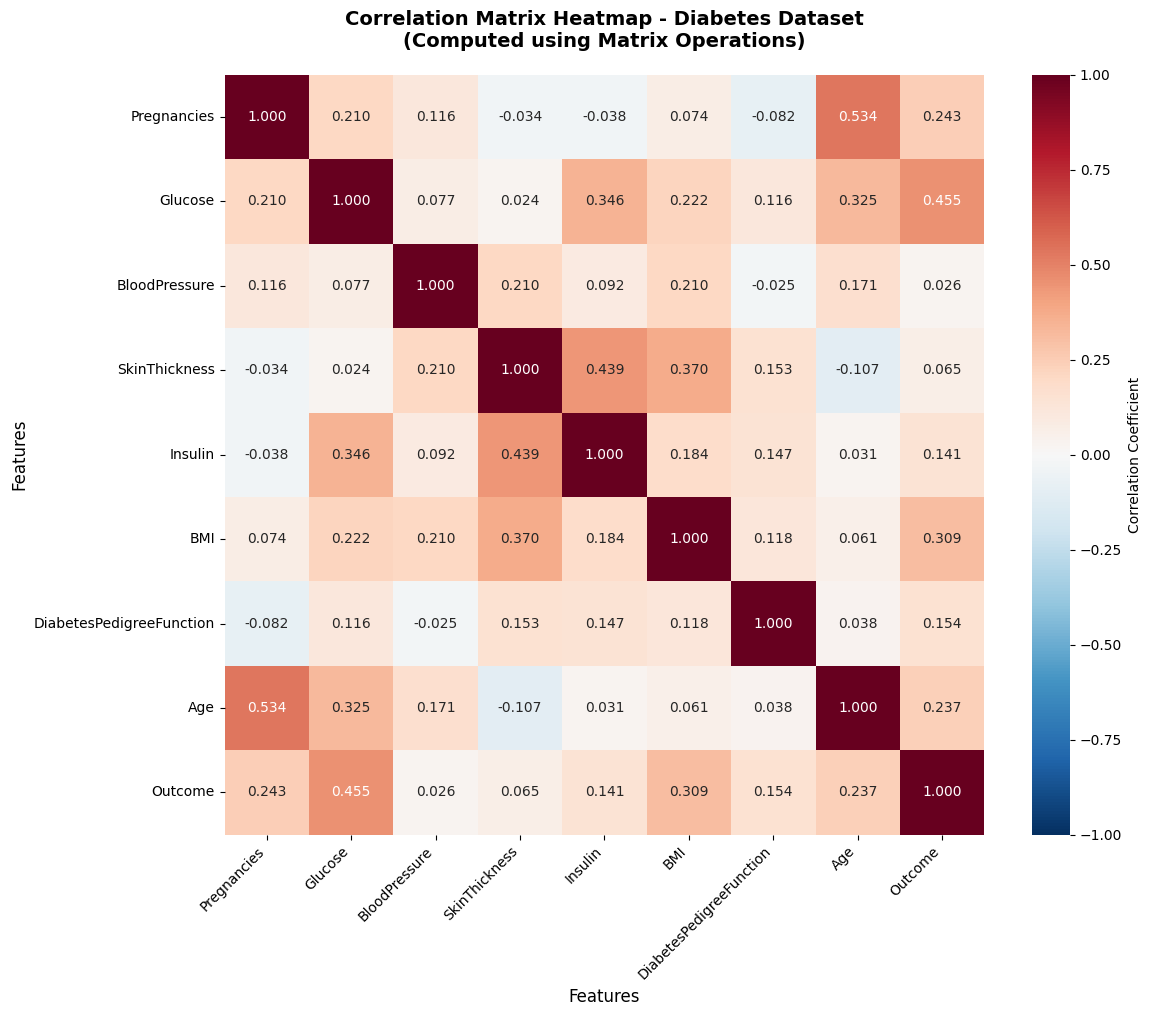

In [8]:
# Correlation matrix = covariance matrix / varmat
# This gives corr[i,j] = cov[i,j] / (std[i] * std[j])
corr = cov / varmat

# Handle potential numerical issues
corr = np.nan_to_num(corr, nan=0.0, posinf=0.0, neginf=0.0)

# Verification with numpy's corrcoef
original_data = diabetesData.values  # Use original uncentered data for corrcoef
corr_numpy = np.corrcoef(original_data.T)
print(f"\nVerification - difference from numpy.corrcoef (should be close to 0):")
print(f"Max absolute difference: {np.max(np.abs(corr - corr_numpy))}")

# Create annotated heatmap using seaborn
plt.figure(figsize=(12, 10))

# Use a mask for better visualization if needed
mask = np.zeros_like(corr, dtype=bool)

sns.heatmap(corr, 
           annot=True,           # Show correlation values
           cmap='RdBu_r',        # Red-Blue colormap (reversed)
           center=0,             # Center colormap at 0
           square=True,          # Square aspect ratio
           fmt='.3f',            # Format numbers to 3 decimal places
           xticklabels=diabetesData.columns,  # Use original column names
           yticklabels=diabetesData.columns,
           cbar_kws={'label': 'Correlation Coefficient'},
           vmin=-1, vmax=1,      # Set explicit range to avoid warnings
           mask=mask)            # Optional mask

plt.title('Correlation Matrix Heatmap - Diabetes Dataset\n(Computed using Matrix Operations)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the heatmap read the following correlations. Also, answer the question below.

In [9]:
# Extract specific correlations from the heatmap

columns = diabetesData.columns
# Map feature names to their index
col_index = {col: i for i, col in enumerate(columns)}

# Extract specific correlations
# Corr(BMI, Outcome)
Corr1 = corr[col_index["BMI"], col_index["Outcome"]]
print(f"\nCorr1 = Corr(BMI, Outcome) = {Corr1:.6f}")

# Corr(Glucose, Outcome)
Corr2 = corr[col_index["Glucose"], col_index["Outcome"]]
print(f"Corr2 = Corr(Glucose, Outcome) = {Corr2:.6f}")

# Corr(Pregnancies, Outcome)
Corr3 = corr[col_index["Pregnancies"], col_index["Outcome"]]
print(f"Corr3 = Corr(Pregnancies, Outcome) = {Corr3:.6f}")

# Find the two features that are most correlated (excluding diagonal)
n = len(columns)
max_corr = 0
best_pair = ('', '')

for i in range(n):
    for j in range(i+1, n):  # Only upper triangle, excluding diagonal
        abs_corr = abs(corr[i, j])
        if abs_corr > max_corr:
            max_corr = abs_corr
            best_pair = (columns[i], columns[j])

bestcorr = [best_pair[0], best_pair[1]]

print(f"Most correlated pair: {bestcorr}")
print(f"Maximum correlation value: {max_corr:.6f}")
print(f"Actual correlation between {bestcorr[0]} and {bestcorr[1]}: {corr[col_index[bestcorr[0]], col_index[bestcorr[1]]]:.6f}")


Corr1 = Corr(BMI, Outcome) = 0.309392
Corr2 = Corr(Glucose, Outcome) = 0.454809
Corr3 = Corr(Pregnancies, Outcome) = 0.243379
Most correlated pair: ['Pregnancies', 'Age']
Maximum correlation value: 0.533530
Actual correlation between Pregnancies and Age: 0.533530


## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [10]:
def normalizeData(X, mean=np.array([]), std=np.array([])):
    if mean.size == 0:  # Calculate mean and std if not provided
        mean = np.mean(X, axis=0)
    if std.size == 0:    
        std = np.std(X, axis=0)
    
    # Avoid division by zero
    std = np.where(std == 0, 1, std)
    normalized_X = (X - mean) / std
    
    return normalized_X, mean, std

**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [11]:
#Sigmoid function
def sigmoid(t):
    # Clip to prevent overflow
    t = np.clip(t, -500, 500)
    sig = 1 / (1 + np.exp(-t))
    return sig

In [12]:
#Derivative of sigmoid function
def derivSigmoid(p):
    deriv_p = p * (1 - p)
    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [13]:
def sigProg(X, w, b):
    z = np.dot(X, w) + b
    p = sigmoid(z)
    return p

**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [14]:
def gradient(X, y, w, b, reg="none", Lambda=0.1):
    n_samples = X.shape[0]
    
    # Get predictions and derivatives
    p = sigProg(X, w, b)
    p_prime = derivSigmoid(p)
    
    # Compute gradient for weights
    error = p - y
    grad_w = np.dot(X.T, error * p_prime) / n_samples
    
    # Add regularization
    if reg == "ridge":
        grad_w += Lambda * w
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w)
    
    # Compute derivative for bias
    deriv_b = np.mean(error * p_prime)
    
    return grad_w, deriv_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [15]:
def grad_descent(grad_w, deriv_b, w, b, eta=0.01):
    w -= eta * grad_w
    b -= eta * deriv_b
    return w, b

**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [16]:
def train(X, y, reg='none', Lambda=0.1, eta=0.01, max_iter=1000):
    n_features = X.shape[1]
    
    # Initialize weights and bias
    w = np.random.normal(0, 0.01, n_features)
    b = 0.0
    
    # Store loss history for plotting
    loss_history = []
    w_norm_history = []
    
    for i in range(max_iter):
        # Compute gradient
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        
        # Update parameters
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
        
        # Compute loss for tracking
        p = sigProg(X, w, b)
        loss = np.mean((p - y)**2)
        if reg == "ridge":
            loss += Lambda * np.sum(w**2)
        elif reg == "lasso":
            loss += Lambda * np.sum(np.abs(w))
        
        loss_history.append(loss)
        w_norm_history.append(np.linalg.norm(w))
        
        # Early stopping if loss is very small
        if loss < 1e-8:
            break
    
    # Plot training progress
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title('Loss vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(w_norm_history)
    plt.title('Weight Norm vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('||w||_2')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return w, b

**Q10.** Predict using the model

Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [17]:
def predict(X, w, b):
    p = sigProg(X, w, b)
    yhat = (p >= 0.5).astype(int)
    return yhat

**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

Trying eta=0.01, reg=none, lambda=0


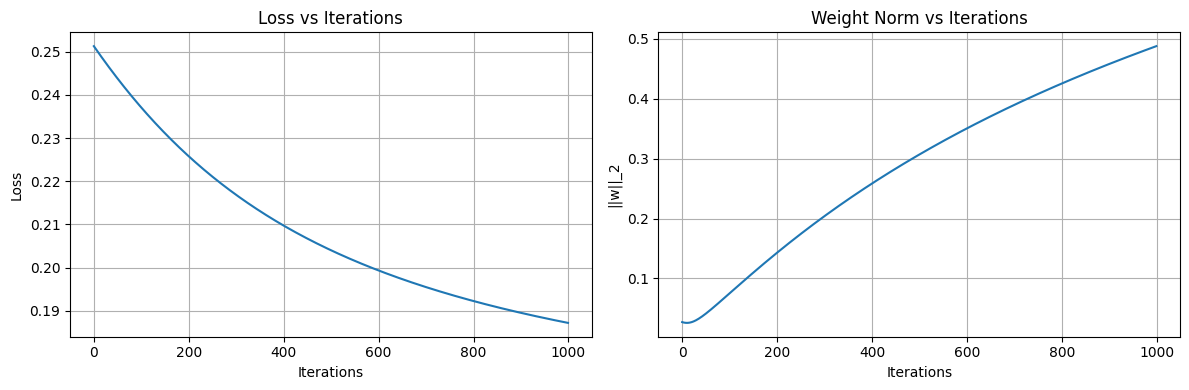

Training accuracy: 0.7343
--------------------------------------------------
Trying eta=0.01, reg=ridge, lambda=0.01


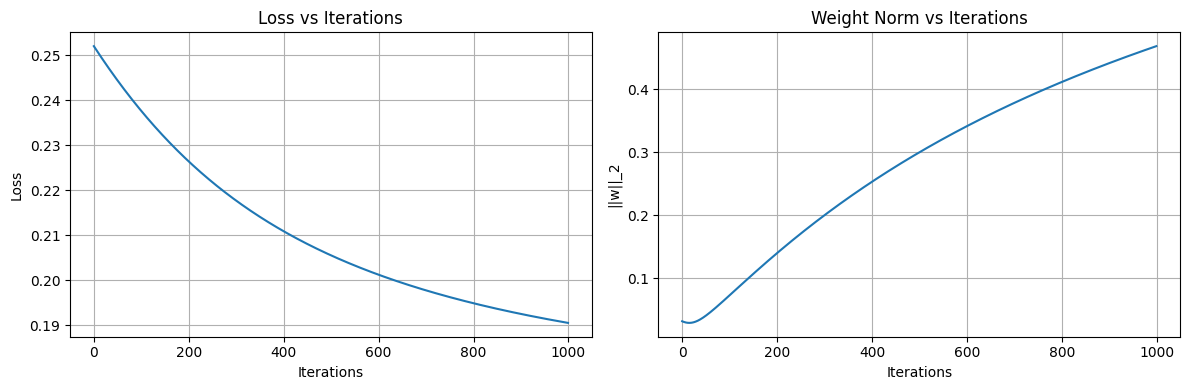

Training accuracy: 0.7318
--------------------------------------------------
Trying eta=0.01, reg=ridge, lambda=0.1


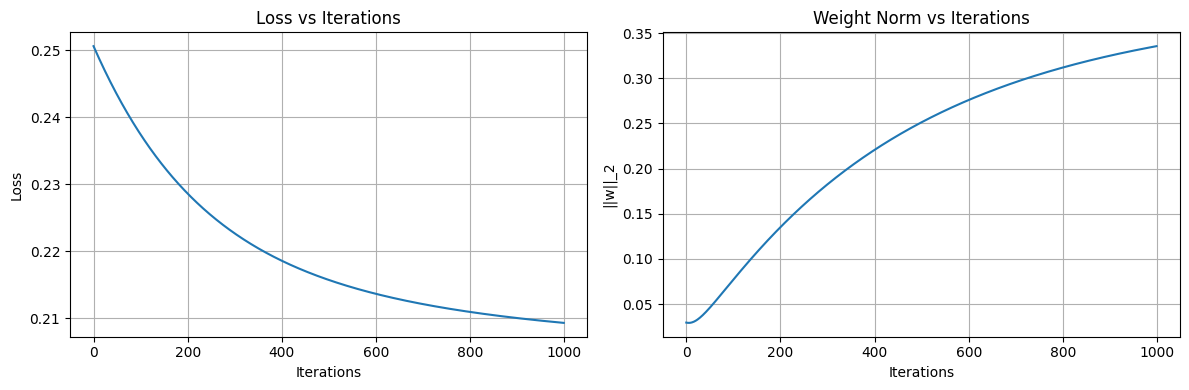

Training accuracy: 0.7494
--------------------------------------------------
Trying eta=0.01, reg=ridge, lambda=1.0


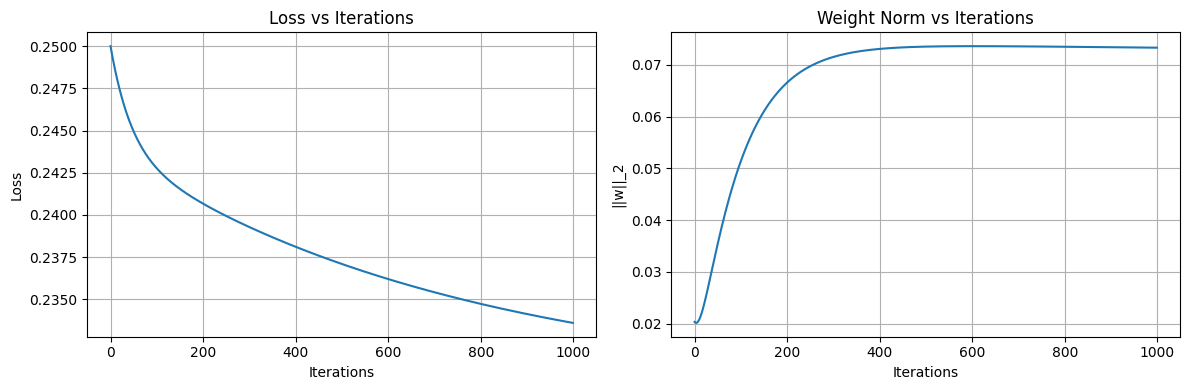

Training accuracy: 0.6291
--------------------------------------------------
Trying eta=0.01, reg=lasso, lambda=0.01


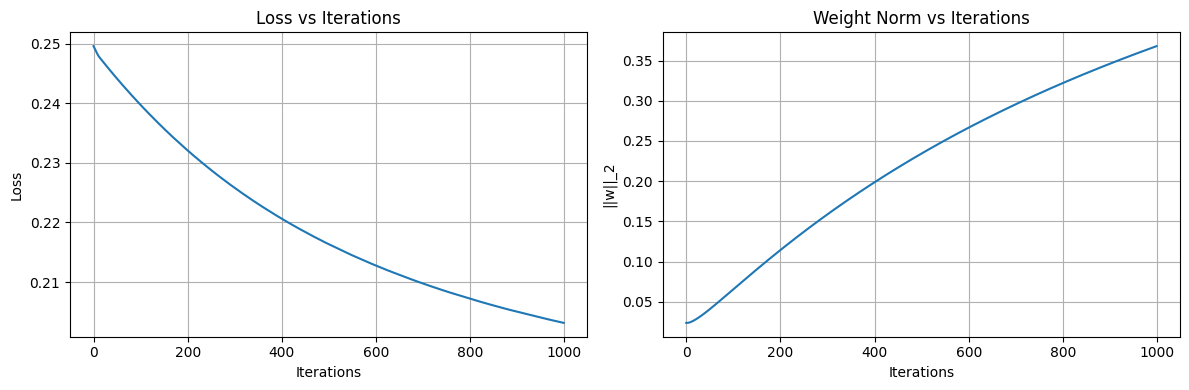

Training accuracy: 0.7393
--------------------------------------------------
Trying eta=0.01, reg=lasso, lambda=0.1


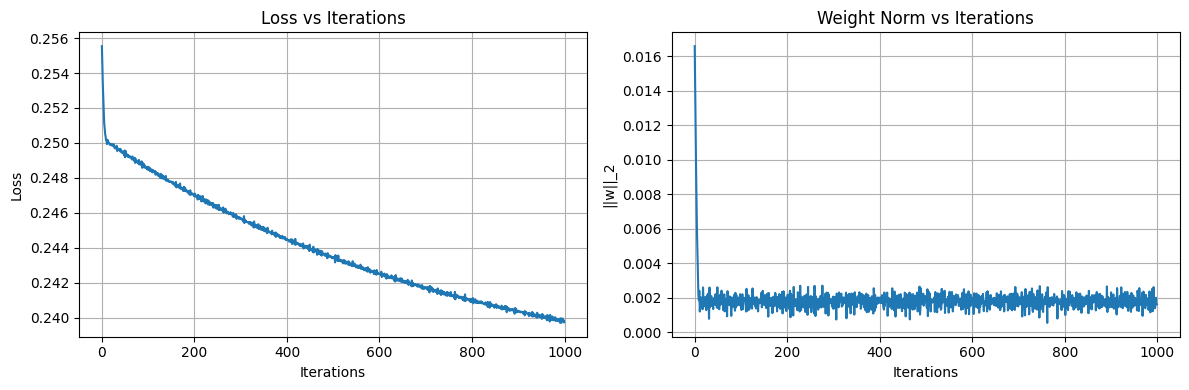

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.01, reg=lasso, lambda=1.0


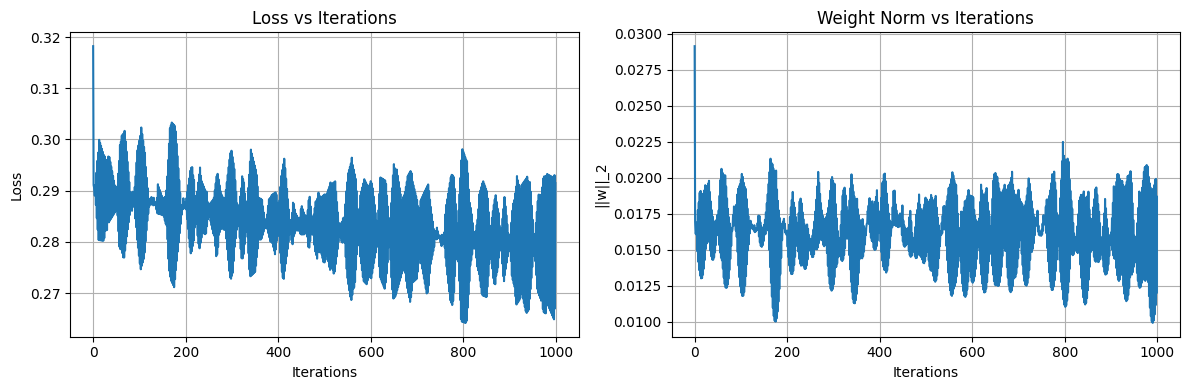

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.1, reg=none, lambda=0


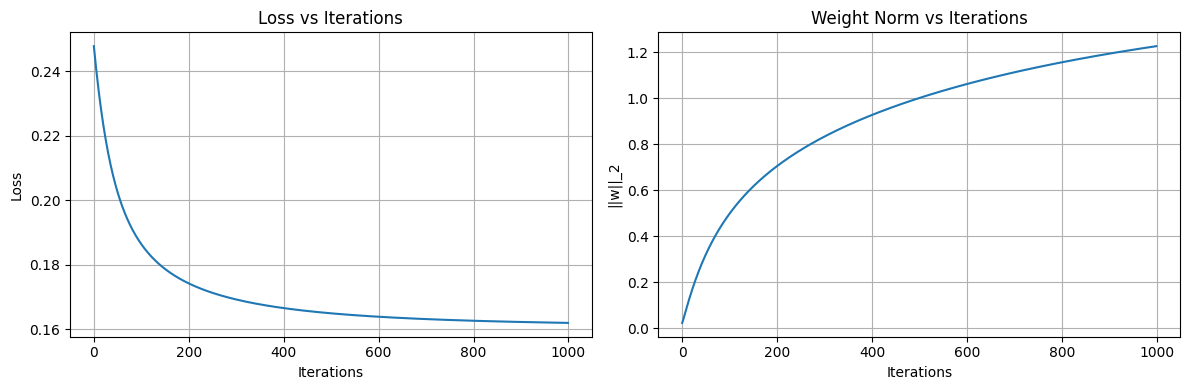

Training accuracy: 0.7569
--------------------------------------------------
Trying eta=0.1, reg=ridge, lambda=0.01


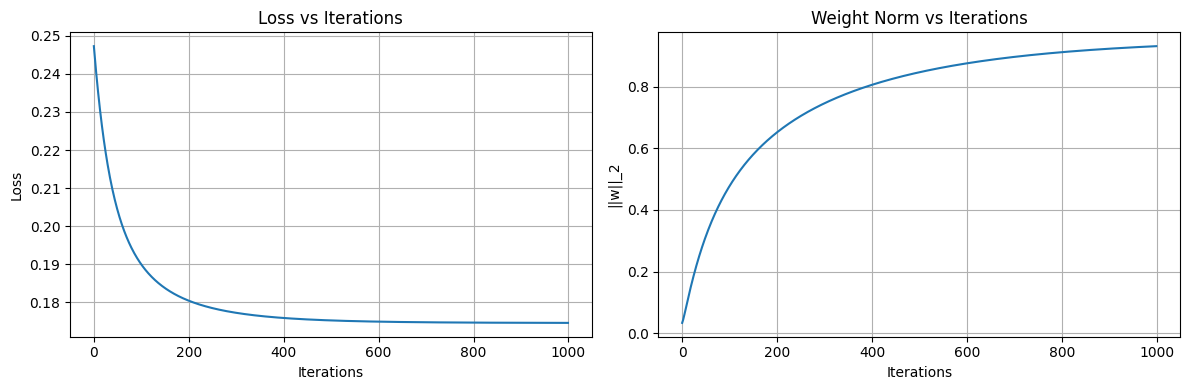

Training accuracy: 0.7619
--------------------------------------------------
Trying eta=0.1, reg=ridge, lambda=0.1


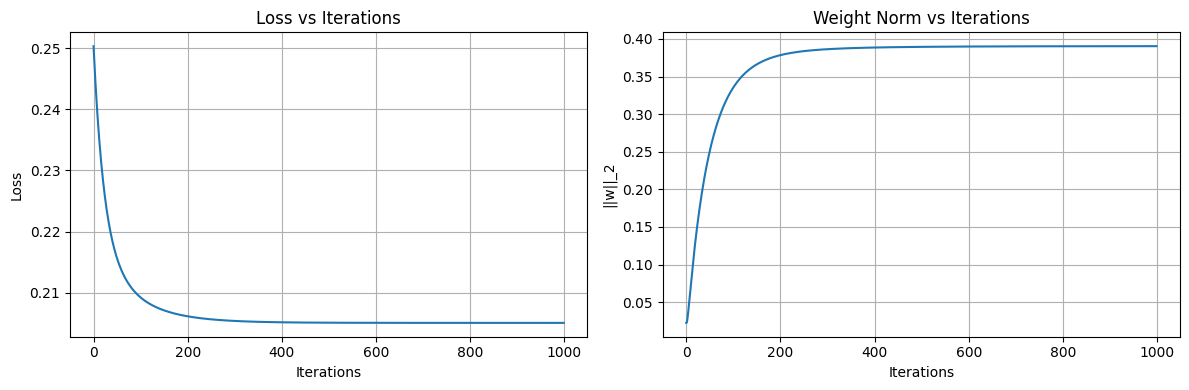

Training accuracy: 0.7368
--------------------------------------------------
Trying eta=0.1, reg=ridge, lambda=1.0


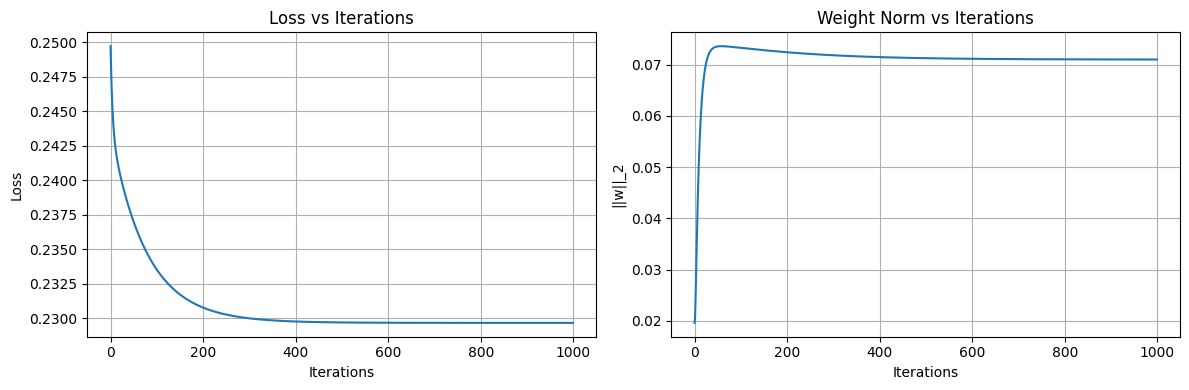

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.1, reg=lasso, lambda=0.01


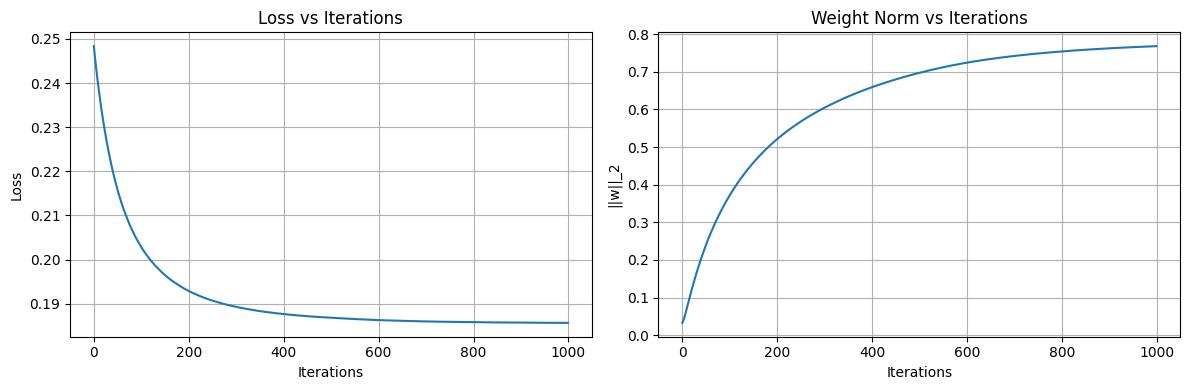

Training accuracy: 0.7544
--------------------------------------------------
Trying eta=0.1, reg=lasso, lambda=0.1


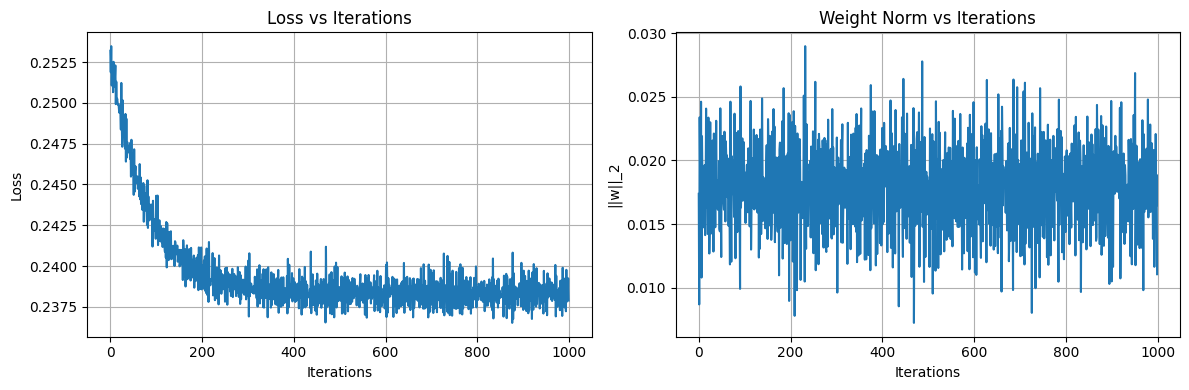

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.1, reg=lasso, lambda=1.0


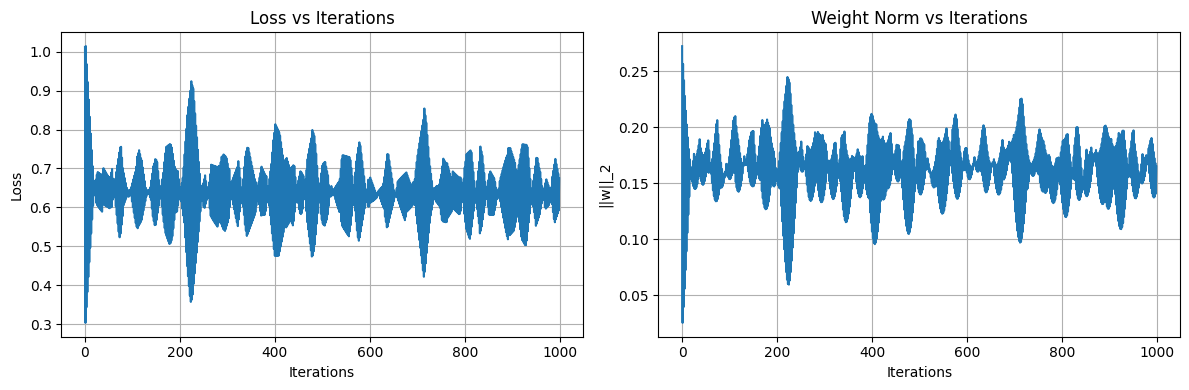

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.5, reg=none, lambda=0


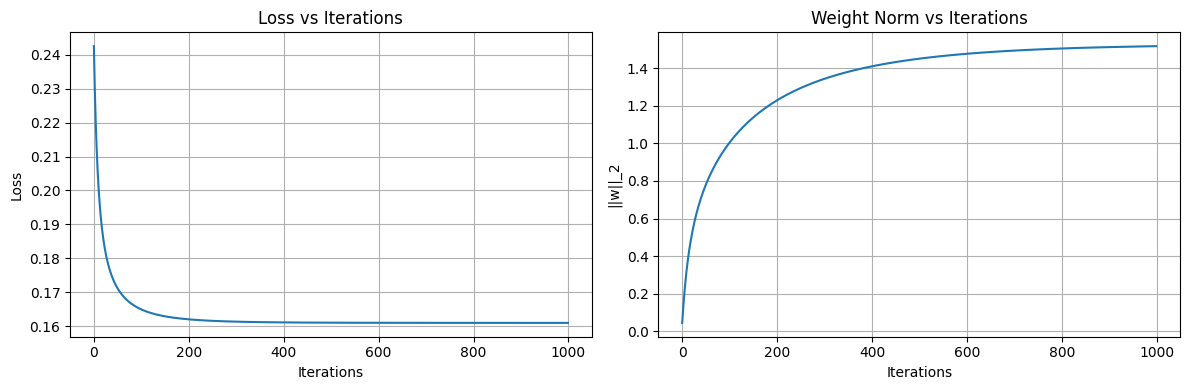

Training accuracy: 0.7619
--------------------------------------------------
Trying eta=0.5, reg=ridge, lambda=0.01


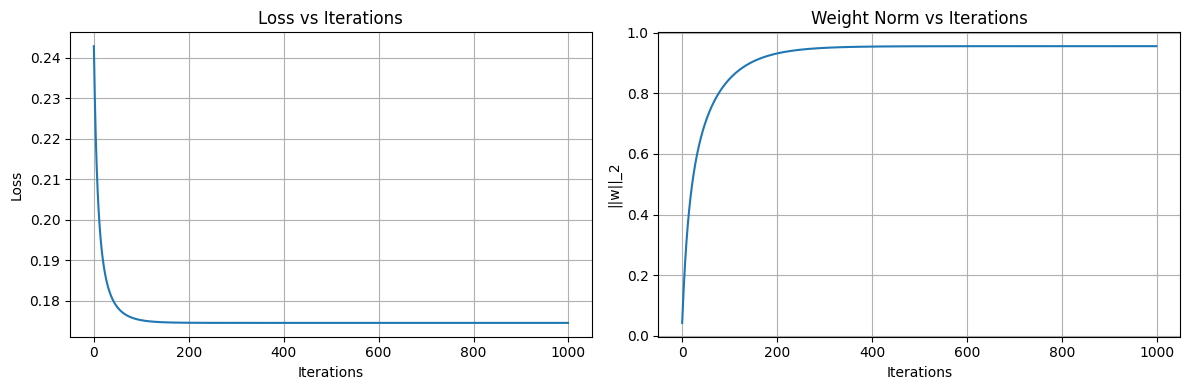

Training accuracy: 0.7644
--------------------------------------------------
Trying eta=0.5, reg=ridge, lambda=0.1


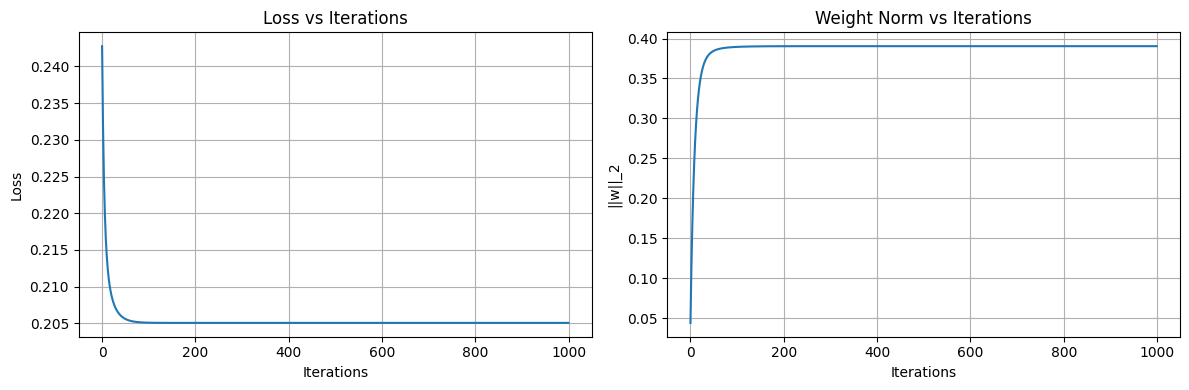

Training accuracy: 0.7368
--------------------------------------------------
Trying eta=0.5, reg=ridge, lambda=1.0


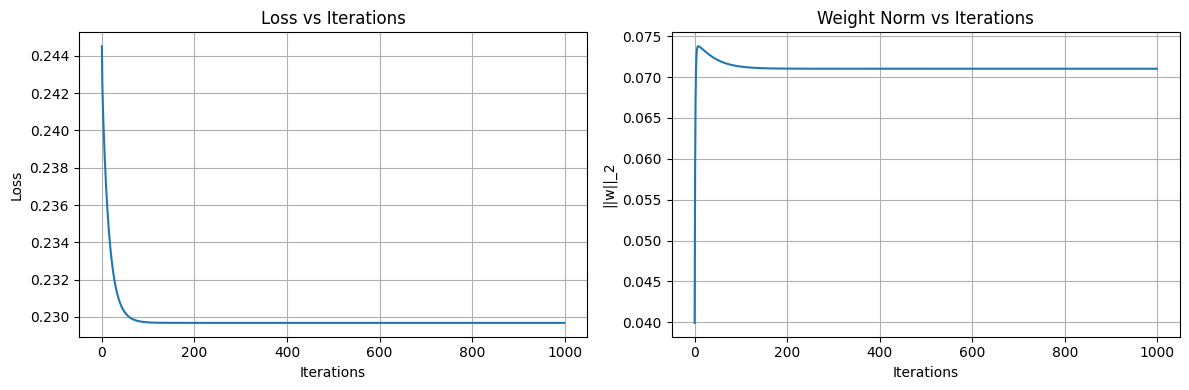

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.5, reg=lasso, lambda=0.01


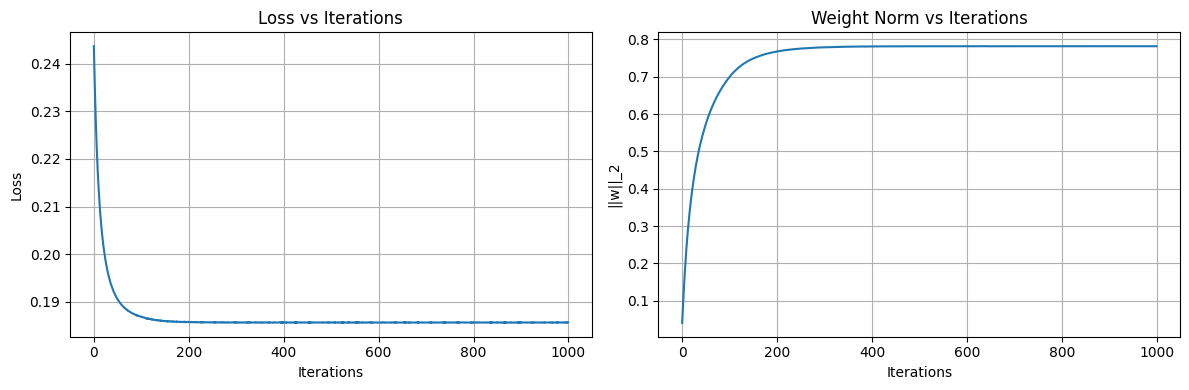

Training accuracy: 0.7544
--------------------------------------------------
Trying eta=0.5, reg=lasso, lambda=0.1


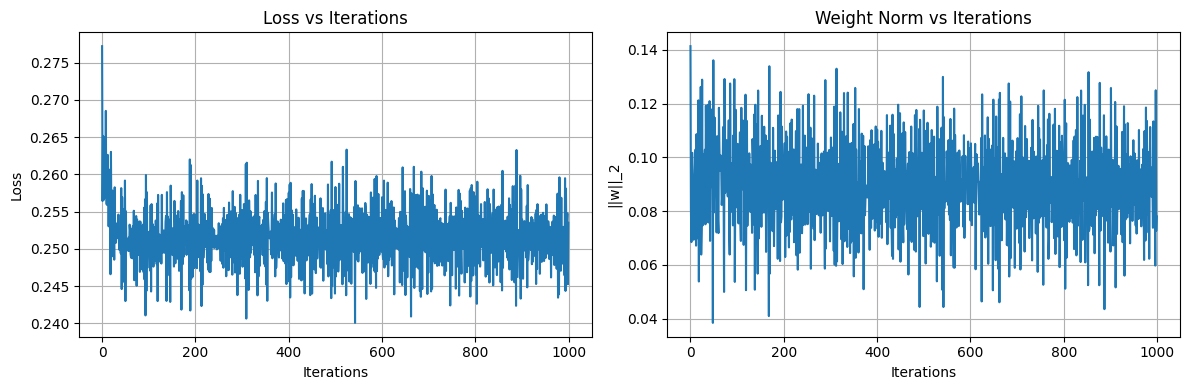

Training accuracy: 0.6216
--------------------------------------------------
Trying eta=0.5, reg=lasso, lambda=1.0


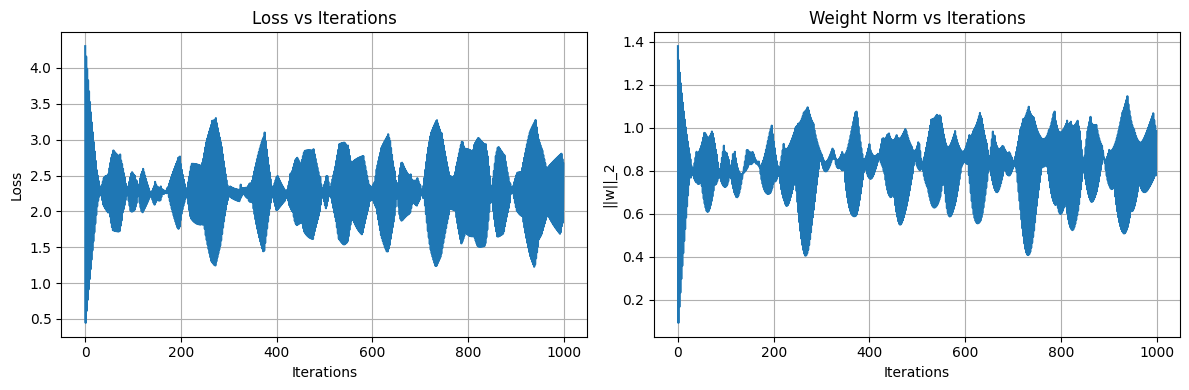

Training accuracy: 0.5714
--------------------------------------------------
Best parameters: {'eta': 0.5, 'reg': 'ridge', 'lambda': 0.01}
Best training accuracy: 0.7644


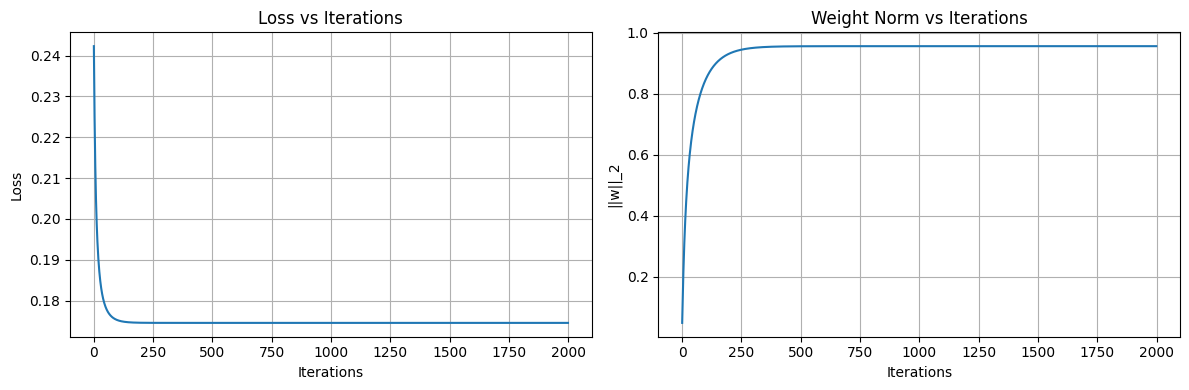

In [18]:
# Separate features and target
feature_columns = diabetesData.columns[:-1]  # All except 'Outcome'
X_train = diabetesData[feature_columns].values
y_train = diabetesData['Outcome'].values

# Normalize features
X_train_normalized, train_mean, train_std = normalizeData(X_train)

# Try different hyperparameters (simple grid search)
best_accuracy = 0
best_params = {}
best_model = None

# Hyperparameter grid
learning_rates = [0.01, 0.1, 0.5]
regularizations = ['none', 'ridge', 'lasso']
lambdas = [0.01, 0.1, 1.0]

for eta in learning_rates:
    for reg in regularizations:
        if reg == 'none':
            lambda_list = [0]
        else:
            lambda_list = lambdas
        
        for lam in lambda_list:
            print(f"Trying eta={eta}, reg={reg}, lambda={lam}")
            
            # Train model
            w, b = train(X_train_normalized, y_train, reg=reg, Lambda=lam, eta=eta, max_iter=1000)
            
            # Evaluate on training data
            y_pred = predict(X_train_normalized, w, b)
            accuracy = np.mean(y_pred == y_train)
            
            print(f"Training accuracy: {accuracy:.4f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'eta': eta, 'reg': reg, 'lambda': lam}
                best_model = (w, b)
            
            print("-" * 50)

print(f"Best parameters: {best_params}")
print(f"Best training accuracy: {best_accuracy:.4f}")

# Train final model with best parameters
w_final, b_final = train(X_train_normalized, y_train, 
                        reg=best_params['reg'], 
                        Lambda=best_params['lambda'], 
                        eta=best_params['eta'], 
                        max_iter=2000)


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


Test predictions: [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
Prediction distribution: [76 24]


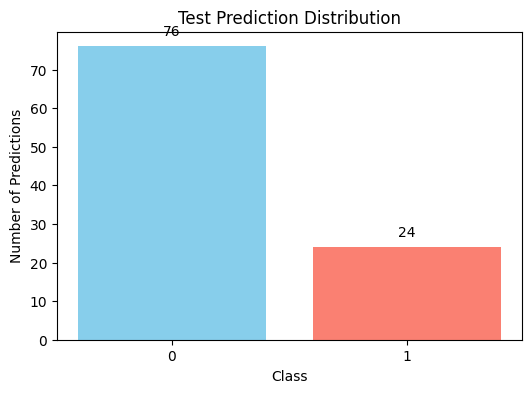

Best hyperparameters: {'eta': 0.5, 'reg': 'ridge', 'lambda': 0.01}
Training accuracy: 0.7644
Number of test predictions: 100
Test predictions - Class 0: 76
Test predictions - Class 1: 24


In [20]:
# Load test data
diabetesTest = pd.read_csv('DiabetesTest.csv')
X_test = diabetesTest[feature_columns].values

# Normalize test data using training statistics
X_test_normalized, _, _ = normalizeData(X_test, train_mean, train_std)

# Make predictions
y_test_pred = predict(X_test_normalized, w_final, b_final)

print(f"Test predictions: {y_test_pred[:]}")
print(f"Prediction distribution: {np.bincount(y_test_pred)}")
# Count predictions
counts = np.bincount(y_test_pred)
classes = np.arange(len(counts))  # Class labels (0, 1, ...)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(classes, counts, color=['skyblue', 'salmon'])
plt.xticks(classes)
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Test Prediction Distribution')
for i, count in enumerate(counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')
plt.show()

# Final results
print(f"Best hyperparameters: {best_params}")
print(f"Training accuracy: {best_accuracy:.4f}")
print(f"Number of test predictions: {len(y_test_pred)}")
print(f"Test predictions - Class 0: {np.sum(y_test_pred == 0)}")
print(f"Test predictions - Class 1: {np.sum(y_test_pred == 1)}")